# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [13]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [14]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

FileNotFoundError: [Errno 2] No such file or directory: '../Lab.7/SUSY.csv'

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [11]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [12]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


NameError: name 'df' is not defined

We can train the classifier as follow:

In [9]:
Fisher.fit(X_Train,y_Train)

NameError: name 'X_Train' is not defined

We can plot the output, comparing signal and background:

In [10]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

NameError: name 'Test_sig' is not defined

<Figure size 640x480 with 0 Axes>

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
svm_classifier = SVC(kernel='rbf', random_state=42)  # SVM with RBF kernel
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)  # Logistic Regression

# Train classifiers
svm_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
lr_pred = lr_classifier.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, classifier_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"{classifier_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("")

# Evaluate each classifier
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, lr_pred, "Logistic Regression")

/tmp/ipykernel_610/2509949042.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


SVM Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Logistic Regression Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000



In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(classifier, X_test, y_test, classifier_name):
    """
    Evaluate a given classifier on test data and print performance metrics.
    
    Parameters:
    classifier (object): Instantiated classifier object.
    X_test (array-like): Test feature data.
    y_test (array-like): True labels corresponding to X_test.
    classifier_name (str): Name of the classifier (for display purposes).
    """
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print performance metrics
    print(f"Evaluation Metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("")

# Example usage of the evaluate_classifier function

# Assuming you have already trained and instantiated classifiers: svm_classifier, rf_classifier, lr_classifier
# and you have X_test and y_test ready from the train-test split

# Evaluate SVM classifier
evaluate_classifier(svm_classifier, X_test, y_test, "SVM")

# Evaluate Random Forest classifier
evaluate_classifier(rf_classifier, X_test, y_test, "Random Forest")

# Evaluate Logistic Regression classifier
evaluate_classifier(lr_classifier, X_test, y_test, "Logistic Regression")

Evaluation Metrics for SVM:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Evaluation Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Evaluation Metrics for Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000



### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


False Positive Rate (FPR): [0.  0.  0.  0.  0.  0.4 0.8 1. ]
True Positive Rate (TPR): [0.  0.2 0.4 0.8 1.  1.  1.  1. ]
ROC AUC: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


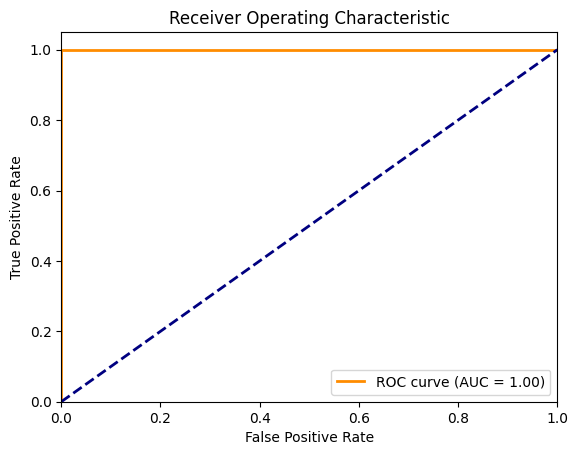

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Replace these with your actual test data and predicted probabilities or labels
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # True labels (ground truth)
y_pred_prob = [0.2, 0.7, 0.3, 0.8, 0.4, 0.9, 0.1, 0.6, 0.2, 0.7]  # Predicted probabilities of the positive class
y_pred_labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Predicted class labels (0 or 1)


# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall metrics
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

# Calculate AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_labels)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_labels)

# Calculate precision and recall
precision = precision_score(y_true, y_pred_labels)
recall = recall_score(y_true, y_pred_labels)

# Print or store the results
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()